Practical 1C

Name: Akshat Tiwari

Batch : A1

Roll No; A1-11

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
print("Original DataFrame:")
print(df.head())
print(f"\n Shape: {df.shape}")

Original DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

 Shape: (150, 5)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.columns[:-1]
x = StandardScaler().fit_transform(df[features])
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print('Dimensionally reduced data:')
print(principalDf.head())

Dimensionally reduced data:
   principal component 1  principal component 2
0              -2.264703               0.480027
1              -2.080961              -0.674134
2              -2.364229              -0.341908
3              -2.299384              -0.597395
4              -2.389842               0.646835


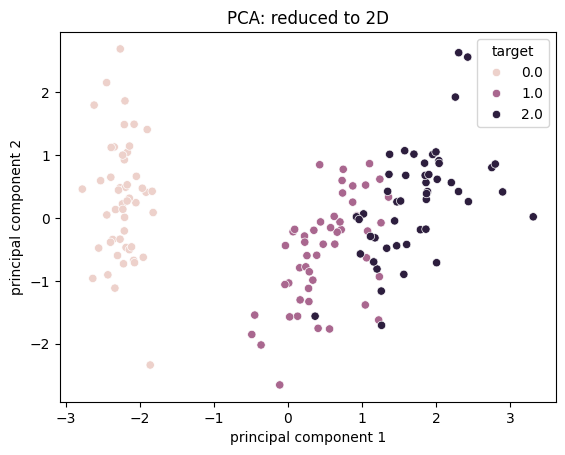

In [ ]:
principalDf['target'] = df.target
sns.scatterplot(x = 'principal component 1', y = 'principal component 2', hue = 'target', data = principalDf)
plt.title("PCA: reduced to 2D")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['sepal length (cm)']]
Y = df[['sepal width (cm)']]

model = LinearRegression().fit(X, Y)
df['Predicted_width'] = model.predict(X)

print("Regression Output")
print(df[['sepal length (cm)', 'sepal width (cm)', 'Predicted_width']].head())

plt.figure(figsize = (8,6))

Regression Output
   sepal length (cm)  sepal width (cm)  Predicted_width
0                5.1               3.5         3.103334
1                4.9               3.0         3.115711
2                4.7               3.2         3.128088
3                4.6               3.1         3.134277
4                5.0               3.6         3.109523


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

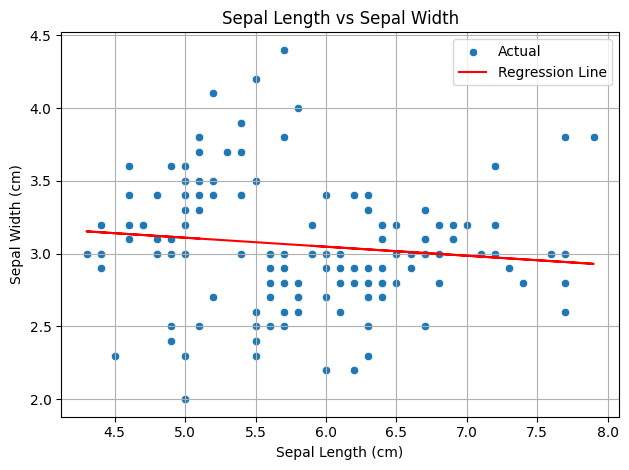

In [ ]:
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, label = 'Actual')
plt.plot(df['sepal length (cm)'], df['Predicted_width'], color = 'red', label = 'Regression Line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_compressed = df.round(decimals = 2)
print('Compressed Data:')
print(df_compressed.head())

Compressed Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  Predicted_width  
0     0.0             3.10  
1     0.0             3.12  
2     0.0             3.13  
3     0.0             3.13  
4     0.0             3.11  


In [ ]:
aggregated_df = df.groupby('target').mean()
print('Aggregated Data by class (Mean): ')
print(aggregated_df)

Aggregated Data by class (Mean): 
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0.0                 5.006             3.428              1.462   
1.0                 5.936             2.770              4.260   
2.0                 6.588             2.974              5.552   

        petal width (cm)  Predicted_width  
target                                     
0.0                0.246         3.109152  
1.0                1.326         3.051599  
2.0                2.026         3.011250  


In [ ]:
sample_df = df.sample(frac = 0.1, random_state = 1)
print('Sample Data (10%):')
print(sample_df)

Sample Data (10%):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
14                 5.8               4.0                1.2               0.2   
98                 5.1               2.5                3.0               1.1   
75                 6.6               3.0                4.4               1.4   
16                 5.4               3.9                1.3               0.4   
131                7.9               3.8                6.4               2.0   
56                 6.3               3.3                4.7               1.6   
141                6.9               3.1                5.1               2.3   
44                 5.1               3.8                1.9               0.4   
29                 4.7               3.2                1.6               0.2   
120                6.9               3.2                5.7               2.3   
94                 5.6               2.7                4.2               1.3   
5        